In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [4]:

>>> data = load_breast_cancer()

In [5]:
X=pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
y = pd.Series(data.target)

In [7]:
df = pd.concat([X, y], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

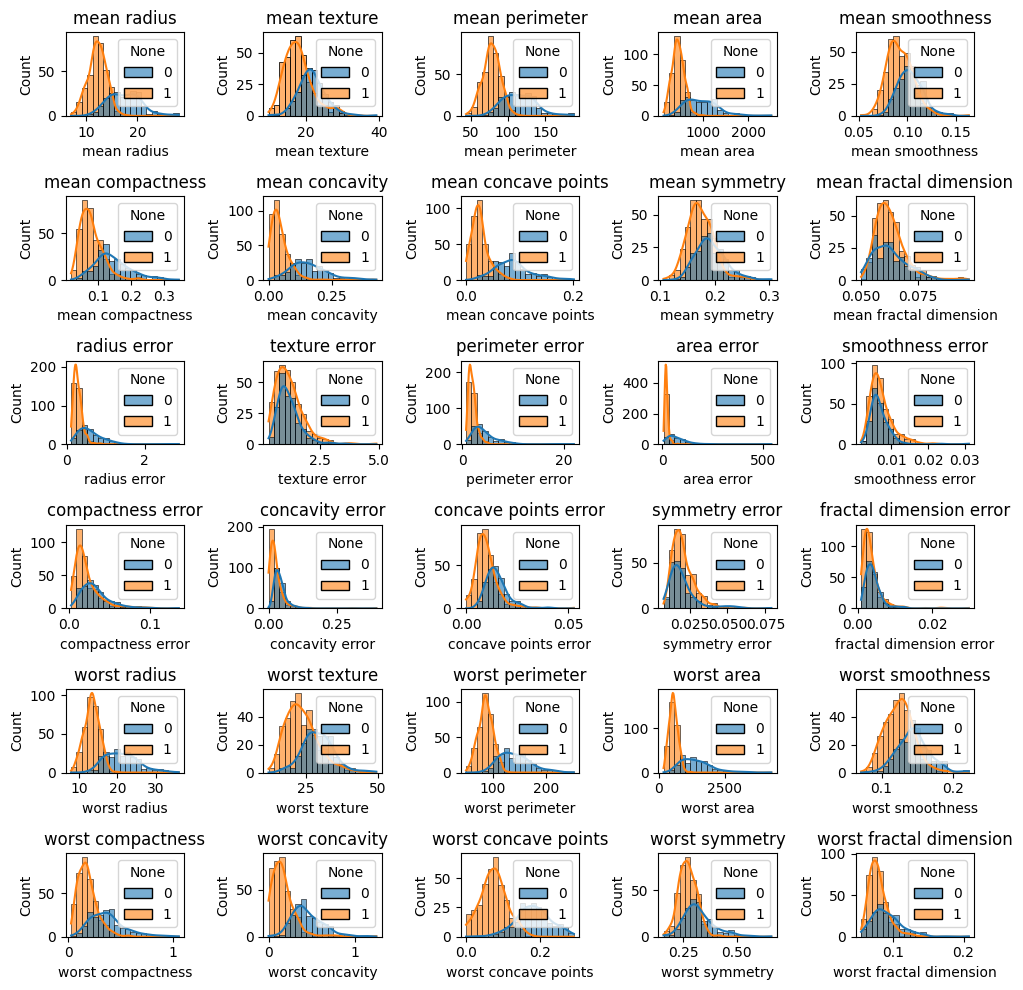

In [9]:
# 2.1 Distribution plots for all features
plt.figure(figsize=(10, 10))
for i,column in enumerate(X.columns, 1):
    plt.subplot(6,5,i)
    sns.histplot(data=X, x=column, hue=y, kde=True, bins=20, alpha=0.6)
    plt.title(column)
    plt.tight_layout()    
plt.show()


In [10]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


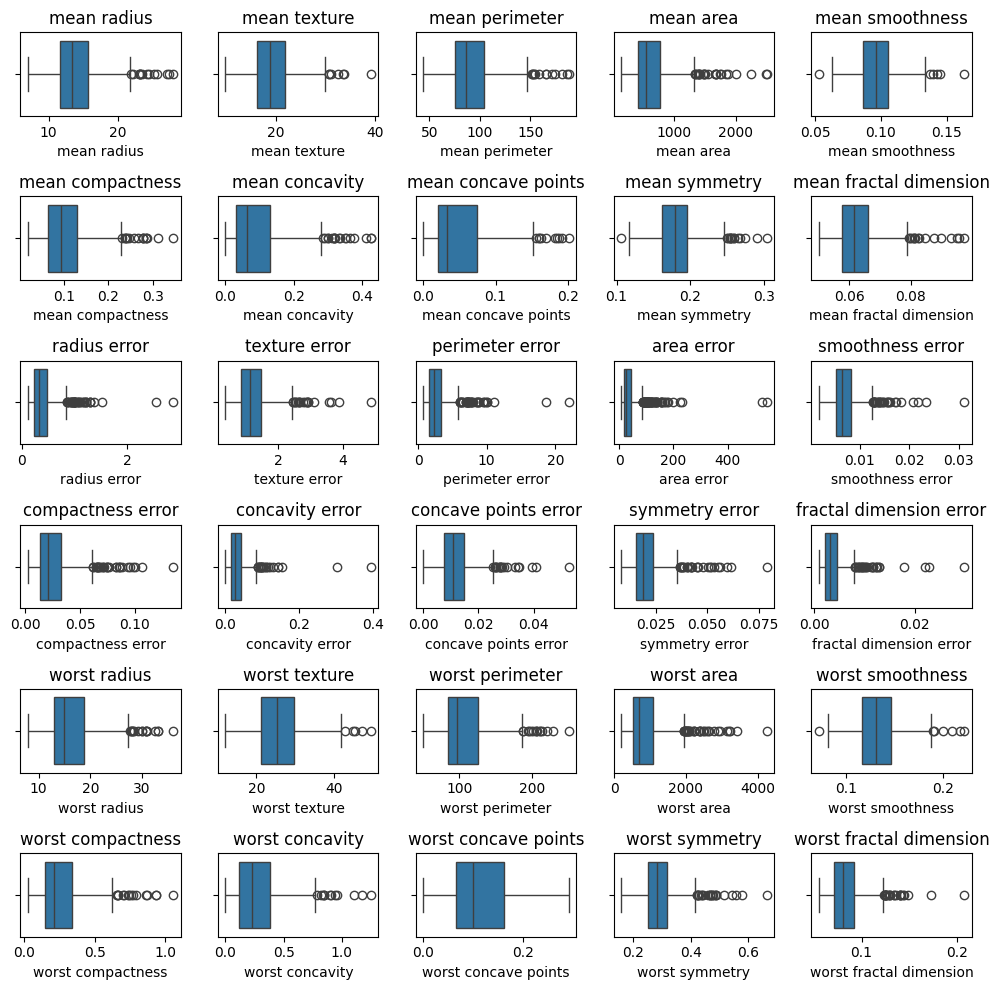

In [11]:
plt.figure(figsize=(10, 10))
for i,column in enumerate(X.columns, 1):
    plt.subplot(6,5,i)
    sns.boxplot(data=X, x=column)
    plt.title(column)
    plt.tight_layout()    
plt.show()

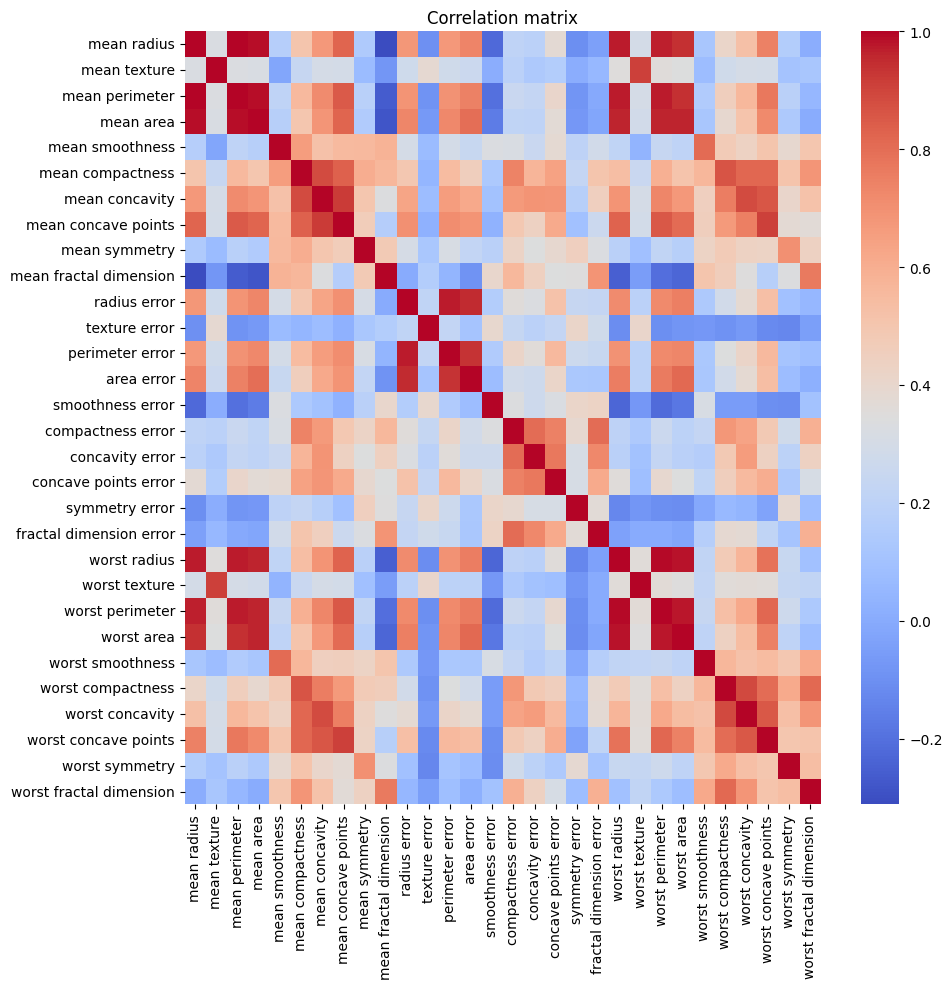

In [12]:
correlation=X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

In [13]:
#Capping Outliers with the Mean:


def detect_and_cap_outliers(df):
    outliers_dict = {}
    
    # Detect outliers and print them
    print("Outliers detected:")
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = len(outliers)
        
        
        # Capping the outliers with the mean of the column
        mean_value = df[column].mean()
        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    
    # Return the DataFrame after capping outliers
    return df, outliers_dict

# Assuming 'X' is your DataFrame
X_capped, outliers_count = detect_and_cap_outliers(X)

# Print the number of outliers in each feature
print("\nNumber of outliers in each feature:")
print(outliers_count)

# Optionally, print the updated dataframe after capping outliers
print("\nData after capping outliers with mean:")
print(X_capped.head())


Outliers detected:

Number of outliers in each feature:
{'mean radius': 14, 'mean texture': 7, 'mean perimeter': 13, 'mean area': 25, 'mean smoothness': 6, 'mean compactness': 16, 'mean concavity': 18, 'mean concave points': 10, 'mean symmetry': 15, 'mean fractal dimension': 15, 'radius error': 38, 'texture error': 20, 'perimeter error': 38, 'area error': 65, 'smoothness error': 30, 'compactness error': 28, 'concavity error': 22, 'concave points error': 19, 'symmetry error': 27, 'fractal dimension error': 28, 'worst radius': 17, 'worst texture': 5, 'worst perimeter': 15, 'worst area': 35, 'worst smoothness': 7, 'worst compactness': 16, 'worst concavity': 12, 'worst concave points': 0, 'worst symmetry': 23, 'worst fractal dimension': 24}

Data after capping outliers with mean:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0      

Capping Outliers with the Mean:
What was done: Any extreme values (outliers) in the dataset were capped with the mean of the respective feature.
Why it was necessary:
Outliers can heavily influence the results of machine learning models, especially those based on distance metrics (e.g., KNN) or sensitive to extreme values (e.g., Logistic Regression).
Capping with the mean ensures that the overall distribution of the data remains largely unchanged while mitigating the effect of extreme values.
This is particularly useful when outliers are likely due to data entry errors or anomalies rather than meaningful deviations.

In [14]:
X1=X_capped

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X1, y, test_size=0.2, random_state=40)

In [16]:
feature_names = data.feature_names

In [17]:
# Feature Selection using SelectKBest
def perform_feature_selection(X_train, X_test, y_train, k=10):
    # Initialize SelectKBest with f_classif scoring function
    selector = SelectKBest(score_func=f_classif, k=k)
    
    # Fit and transform the training data
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Transform the test data
    X_test_selected = selector.transform(X_test)
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_features = feature_names[selected_features_mask]
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    return X_train_selected, X_test_selected, selected_features, feature_scores

In [18]:
# Perform feature selection
k_features = 10
X_train_selected, X_test_selected, selected_features, feature_scores = perform_feature_selection(
    X_train, X_test, y_train, k=k_features
)

In [19]:
print("\nTop 10 Selected Features:")
print("-" * 50)
for i, feature in enumerate(selected_features, 1):
    score = feature_scores[feature_scores['Feature'] == feature]['Score'].values[0]
    print(f"{i}. {feature}: {score:.2f}")


Top 10 Selected Features:
--------------------------------------------------
1. mean radius: 526.02
2. mean perimeter: 573.86
3. mean area: 502.83
4. mean concavity: 518.30
5. mean concave points: 705.55
6. worst radius: 692.72
7. worst perimeter: 749.74
8. worst area: 638.90
9. worst concavity: 394.88
10. worst concave points: 750.85


Top 10 Feature Selection using F-Classif:
What was done: Feature selection was performed using the ANOVA F-test (f_classif) to identify the 10 most important features.
Why it was necessary:
Datasets with many features often contain irrelevant or redundant information, which can lead to overfitting and reduced model performance.
Selecting the top features using statistical measures like F-values helps retain only those features that have the most significant relationship with the target variable.
By reducing the feature set to the top 10, computational efficiency is improved, and models become easier to interpret while retaining critical predictive information.

In [20]:
#sacling using standard scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

Standard Scaling:
What was done: All features were standardized to have a mean of 0 and a standard deviation of 1.
Why it was necessary:
Many machine learning algorithms, such as Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Logistic Regression, are sensitive to feature scales because they use distance or magnitude calculations.
Standard scaling ensures all features contribute equally to the model, preventing bias toward features with larger ranges.
Scaling also improves the convergence rate of gradient-based algorithms like Gradient Boosting and Logistic Regression.

In [21]:
LR=LogisticRegression()
LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
y_pred_LR=LR.predict(X_test_scaled)

In [59]:
accuracy_LR=accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR, average='weighted')
recall_LR = recall_score(y_test, y_pred_LR, average='weighted')
f1_LR = f1_score(y_test, y_pred_LR, average='weighted')

In [24]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_LR))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.99      0.97      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



[[38  1]
 [ 2 73]]


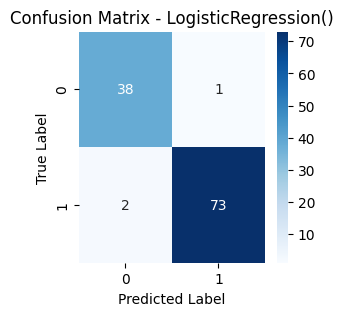

In [49]:
cm_LR = confusion_matrix(y_test, y_pred_LR)
print(cm_LR)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {LR}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Decision Tree
How it works:
Decision Trees split the data into branches based on feature thresholds, creating a tree-like structure where each leaf represents a class label. It uses metrics like Gini Impurity or Information Gain to determine splits.
Suitability:
Decision Trees are simple and interpretable, making them useful for understanding feature importance. However, they are prone to overfitting on small datasets, so their performance may be limited without proper regularization or ensemble methods.

In [27]:
#Decision Tree

DT=DecisionTreeClassifier(max_depth=4, random_state=42)
DT.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [28]:
y_pred_DT=DT.predict(X_test_scaled)

In [60]:
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT, average='weighted')
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')
f1_DT = f1_score(y_test, y_pred_DT, average='weighted')

In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_DT))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        39
           1       0.97      0.92      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



[[37  2]
 [ 6 69]]


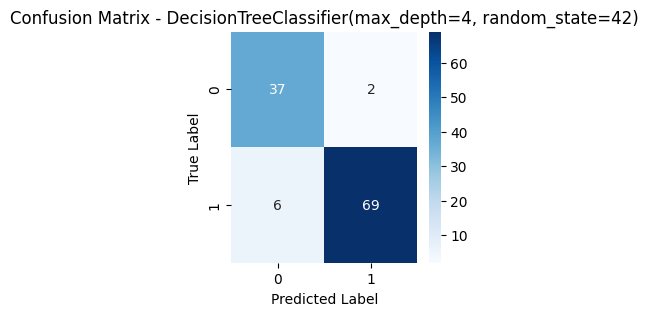

In [50]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
print(cm_DT)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {DT}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Random Forest
How it works:
Random Forest is an ensemble learning method that builds multiple decision trees during training and averages their predictions for classification or regression tasks. It reduces overfitting by combining the results of many trees trained on random subsets of data and features.
Suitability:
Random Forest is well-suited for this dataset as it can handle non-linear relationships and works effectively with both numerical and categorical data. It is robust to noise, outliers, and irrelevant features, especially after preprocessing and feature selection.

In [32]:
#Random Forest

RF=RandomForestClassifier(n_estimators=100, 
                         max_depth=10,
                         random_state=42)

In [33]:
RF.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [34]:
y_pred_RF=RF.predict(X_test_scaled)

In [61]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')
f1_RF = f1_score(y_test, y_pred_RF, average='weighted')

In [75]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_RF))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.97      0.93      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



[[37  2]
 [ 5 70]]


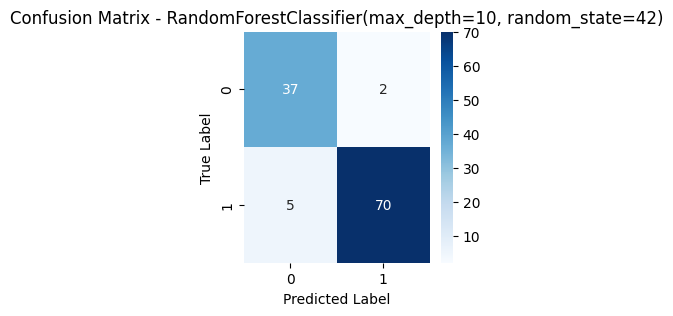

In [76]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {RF}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Gradient Boosting
How it works:
Gradient Boosting builds an ensemble of weak learners (typically decision trees) in a sequential manner, where each tree corrects the errors of the previous one. It minimizes a loss function using gradient descent.
Suitability:
Gradient Boosting is suitable for datasets with complex, non-linear relationships. It is highly flexible and can achieve state-of-the-art performance with proper tuning. For this dataset, it can capture intricate patterns that simpler models might miss.

In [36]:
GB = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=3,
    random_state=42
)

In [37]:
GB.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=200, random_state=42)

In [38]:
y_pred_GB=GB.predict(X_test_scaled)

In [62]:
accuracy_GB = accuracy_score(y_test, y_pred_GB)
precision_GB = precision_score(y_test, y_pred_GB, average='weighted')
recall_GB = recall_score(y_test, y_pred_GB, average='weighted')
f1_GB = f1_score(y_test, y_pred_GB, average='weighted')

In [40]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_GB))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        39
           1       0.97      0.92      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



[[37  2]
 [ 6 69]]


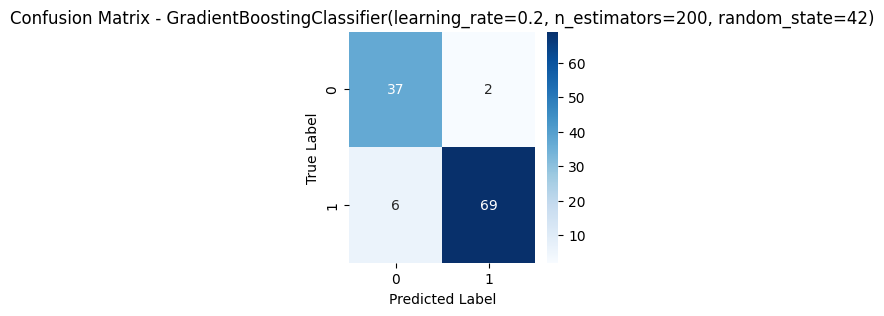

In [51]:
cm_GB = confusion_matrix(y_test, y_pred_GB)
print(cm_GB)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_GB, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {GB}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Support Vector Machine (SVM)
How it works:
SVM finds the hyperplane that best separates the classes in the feature space by maximizing the margin between the closest points of each class (support vectors). It uses kernel functions to handle non-linear relationships.
Suitability:
SVM is ideal for datasets with clear class separations. It works well with high-dimensional spaces and is effective for datasets where the number of features is comparable to the number of samples, especially after scaling.

In [42]:
# SVM Model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)


In [43]:
print("SVM Model Classification Report")
print(classification_report(y_test, y_pred_svm))


SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.99      0.99      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


In [63]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

[[38  1]
 [ 1 74]]


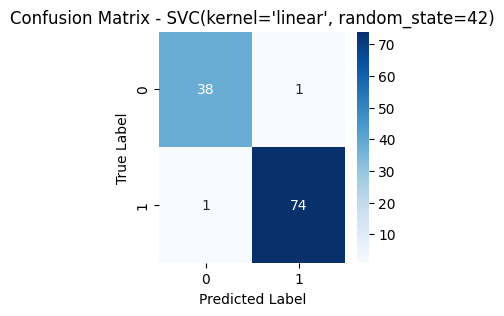

In [52]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {svm}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

K-Nearest Neighbors (KNN)
How it works:
KNN classifies a data point based on the majority class of its k-nearest neighbors in the feature space, using distance metrics like Euclidean distance. It is a lazy learning algorithm that doesn’t build a model but memorizes the training data.
Suitability:
KNN is suitable for smaller datasets as it is computationally expensive for large datasets. After standard scaling, it can perform well in datasets where class boundaries are defined by proximity in the feature space.

In [44]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [45]:
print("\nKNN Model Classification Report")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Model Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        39
           1       0.97      0.95      0.96        75

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315


In [64]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

[[37  2]
 [ 4 71]]


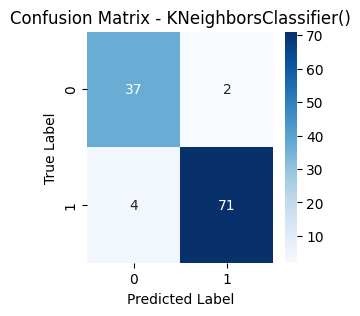

In [53]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {knn}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [65]:
metrics = {
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "SVM", "KNN"],
    "Accuracy": [accuracy_LR, accuracy_RF, accuracy_DT, accuracy_GB, accuracy_svm, accuracy_knn],
    "Precision": [precision_LR, precision_RF, precision_DT, precision_GB, precision_svm, precision_knn],
    "Recall": [recall_LR, recall_RF, recall_DT, recall_GB, recall_svm, recall_knn],
    "F1-Score": [f1_LR, f1_RF, f1_DT, f1_GB, f1_svm, f1_knn]
}

In [66]:
results_df = pd.DataFrame(metrics)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.973684   0.974004  0.973684  0.973762
1        Random Forest  0.938596   0.940998  0.938596  0.939107
2        Decision Tree  0.929825   0.933732  0.929825  0.930575
3    Gradient Boosting  0.929825   0.933732  0.929825  0.930575
4                  SVM  0.982456   0.982456  0.982456  0.982456
5                  KNN  0.947368   0.948599  0.947368  0.947671


C:\Users\jeeva\AppData\Local\Temp\ipykernel_22184\1977774100.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\jeeva\AppData\Local\Temp\ipykernel_22184\1977774100.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\jeeva\AppData\Local\Temp\ipykernel_22184\1977774100.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\jeeva\AppData\Local\Temp\ipykernel_22184\1977774100.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')


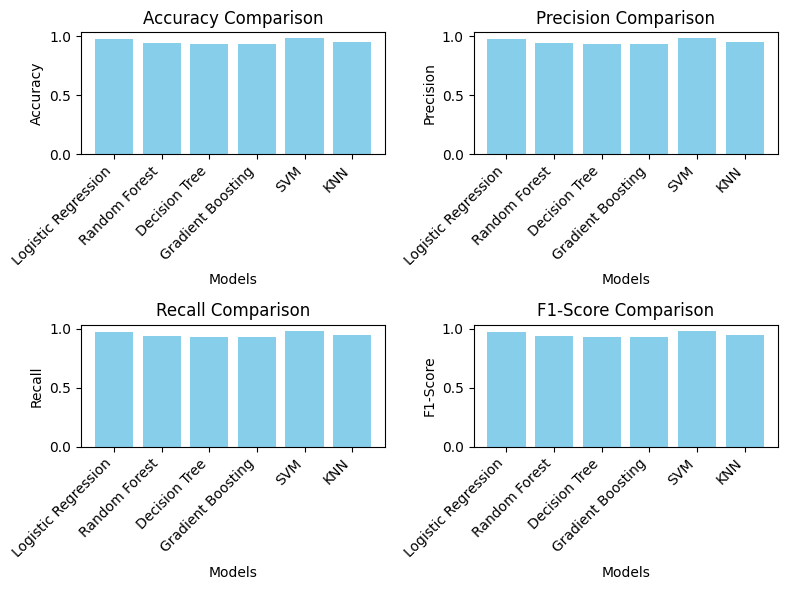

In [68]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
models = results_df["Model"]

# Plot for each metric
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    ax.bar(models, results_df[metric], color='skyblue')
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [69]:
df_melted = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                    var_name='Metric', value_name='Score')

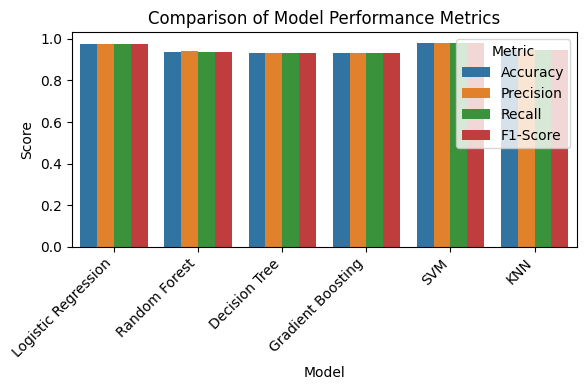

In [73]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')

# Customize the plot
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')

# Show the plot
plt.tight_layout()
plt.show()

In [74]:
# Identify the best model (maximum accuracy)
best_model = results_df.loc[results_df['Accuracy'].idxmax()]

# Identify the worst model (minimum accuracy)
worst_model = results_df.loc[results_df['Accuracy'].idxmin()]

# Print results
print("Best Model:")
print(best_model)

print("\nWorst Model:")
print(worst_model)

Best Model:
Model             SVM
Accuracy     0.982456
Precision    0.982456
Recall       0.982456
F1-Score     0.982456
Name: 4, dtype: object

Worst Model:
Model        Decision Tree
Accuracy          0.929825
Precision         0.933732
Recall            0.929825
F1-Score          0.930575
Name: 2, dtype: object
